# Proposta da tarefa


Como analisar um modelo de machine learning e suas métricas, assim como ter insights a partir de seu aprendizado. Dois vídeos foram vistos para a realiazação da tarefa.


Vídeo 1: [COMPARANDO MODELOS DE MACHINE LEARNING!!](https://youtu.be/_Y1SWuKr4Tg?si=pSB54HpAYizX9Xgf) (1 hora e 40 minutos)


Vídeo 2: [Como Entender Seu Modelo de Machine Learning - Especial Outubro Rosa - (Python/SHAP/Scikit-learn)](https://youtu.be/J5E4umn8Fb4?si=JNCDQotZ9CuQCJx1) (24 minutos)




# Comparando modelos de machine learning


## Métricas de validação


As métricas estudadas a seguir são recursos matemáticos úteis para avaliação de um modelo, ou seja, o quão bom ele foi segundo alguma fórmula. Esses processos são aplicados tanto em modelos regressão e classificação.


### Matriz de confusão


Como problemas de classificação envolve categorizar os dados em diferentes classes, uma matriz de confusão irá criar uma tabela para comparar classes originais, e classes predizidas pelo modelo. Dessa forma, se obtém um entendimento mais específico de onde o modelo possa estar errando.


Visto que se relaciona a predição de um modelo com os dados originais, em um problema de classificação binário (0 = negativo e 1 = positivo), existem os casos:


* Verdadeiro negativo (Vn): predição = 0 e dado original = 0


* Verdadeiro positivo (Vp): predição = 1 e dado original = 1


* Falso negativo (Fn): predição = 0 e dado original = 1


* falso positivo (Fp): predição = 1 e dado original = 0


A partir do erros e acertos presentes na matriz de confusão, outras métricas podem ser criadas relacionando onde o modelo acertou, e onde errou.


### Acurácia


Um modelo acurado é aquele que dentro do total de predições feitas, possui um grande número de acertos.


acurácia = acertos/total = Vn + Vp / Vn + Fn + Vp + Fp


### Precisão


Usada em situação onde precisa avaliar de todos os casos que foram previstos como positivos, quantos deles estavam certos.


precisão = Vp / Vp + Fp


Na fórmula acima, caso os valores de falsos positivos sejam zero, a precisão do modelo será 1, e conforme esse número aumenta, a precisão diminui. Ou seja, o modelo, em um caso exemplo de predição de fraude em cartões, conforme mais casos onde foi previsto que era uma fraude e na verdade não era, a precisão diminui. Esse método é bom para casos como esse de exemplo por se tratarem de base de dados em que se possui poucos casos da classe positiva.


### Recall ou sensibilidade


De todos os casos originalmente positivos, quantos deles foram acertados. Ou, o quão próximo o modelo está do caso ideal de acertar tudo.


recall = Vp / Vp + Fn


O recall será 1 quando os falsos negativos serem 0, ou seja, de todos os dados positivos, o modelo não categorizou erroneamente nenhum como negativo.


Em especial para essa métrica, caso todos os dados sejam tidos como positivos (todos os cartões forem fraudes), o recall será igual a 1, pois não haverá nenhum falso negativo, algo que deve ser levado em consideração para cada problema futuro.


### Especificidade


especificidade = Vn / Vn + Fp


Similar ao recall, de todos os valores originalmente negativos, quanto deles foram predizidos como negativos.


### Curva Roc


Em suma, entendendo o papel da sensibilidade (capacidade do modelo em identificar corretamente os casos positivos) e especificidade (habilidade do modelo em identificar corretamente os casos negativos), ambos podem ser combinados para interpretar o desempenho do modelo.


Em casos de classificação, modelos como logistic regression, SVM e outros funcionam calculando probabilidade de um dado pertencer à classe positiva ou negativa através do limiar de decisão, responsável por servir como divisão das classes dos dados. Ou seja, alterar o limiar de modo a categorizar todos como positivos ou todos como negativos, altera os valores de sensibilidade e especificidade dos resultados obtidos pelo modelo.


Ao classificar todos como negativos, tem-se a especificidade como 1, e o contrário serve para a sensibilidade quando se tem todos os casos como positivos. Ambos conceitos são complementares pois, ao variar o limiar entre essas extremidades, a curva ROC é gerada plotando a Sensibilidade no eixo y (vertical) e 1 - Especificidade no eixo x (horizontal) para diferentes valores de limiar de decisão do modelo. Cada ponto na curva representa um ponto de operação do modelo em relação a essas taxas. Quanto mais próxima a curva estiver do canto superior esquerdo do gráfico, melhor será o desempenho do modelo (classificar corretamente os casos positivos e negativos).


### AUC


Tal curva é medida e analisada observando o quão próxima ela chega do canto superior esquerdo do gráfico, ou seja, calculada a área de baixo da curva (área under the curve), os melhores modelos são aqueles com maiores áreas. Isso é útil quando é necessário se comparar modelos diferentes.









# Como entender seu modelo de machine learning


No segundo vídeo, o intuito é mostrar como os modelos de machine learning além de predizer, oferecem insights e análises sobre um problema. O data de câncer de mama é utilizado no vídeo, onde objetivo é, a partir de dados do câncer como raio, textura, perímetros e outros, julgar se o câncer é maligno ou benigno.


Em especial, no vídeo é usada a biblioteca SHAP para analisar o modelo de árvore criado. Ao utilizar o  seguinte comando force_plot da SHAP, o gráfico abaixo é gerado

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], Xtrain.iloc[0,:])

##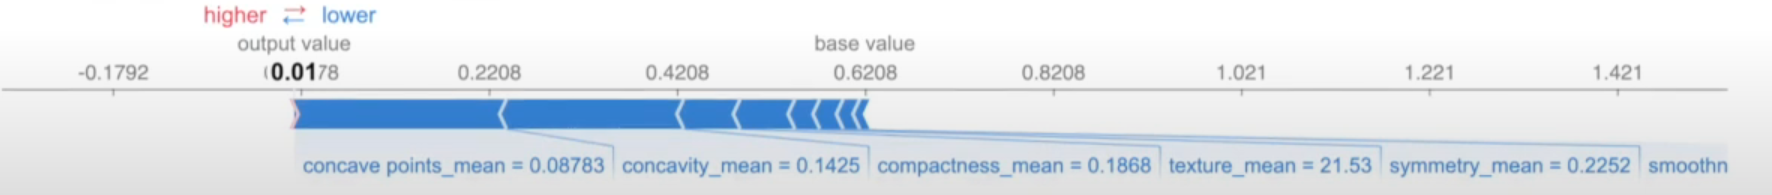


O gráfico acima utiliza do modelo treinado e analisa um dos casos do dataset para ver o que o modelo entende de sua predição. Nesse caso o câncer tem 0.01 de chances de ser benigno, onde as features que mais contribuíram para esse resultado foram as concavidade, compactação e textura, cada uma influenciando a certeza do modelo ficar cada vez mais próximo de 0.


Em outro caso:


In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1, :], Xtrain.iloc[1,:])

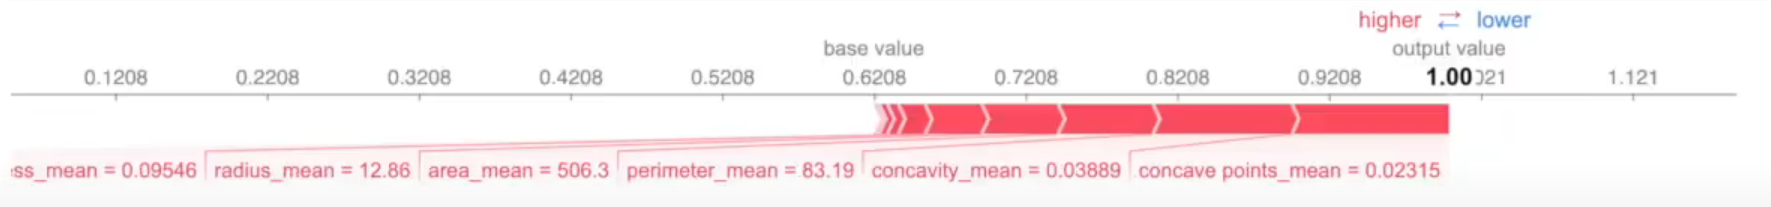


O caso analisado tem 100% de chance de ser benigno, e cada feature (agora diferente dos anteriores) participa de forma diferente na conclusão do modelo.


A SHAP também possibilita a análise no dataset como um todo. O exemplo abaixo analisa a média das concavidades no câncer e como ela altera a classificação


In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

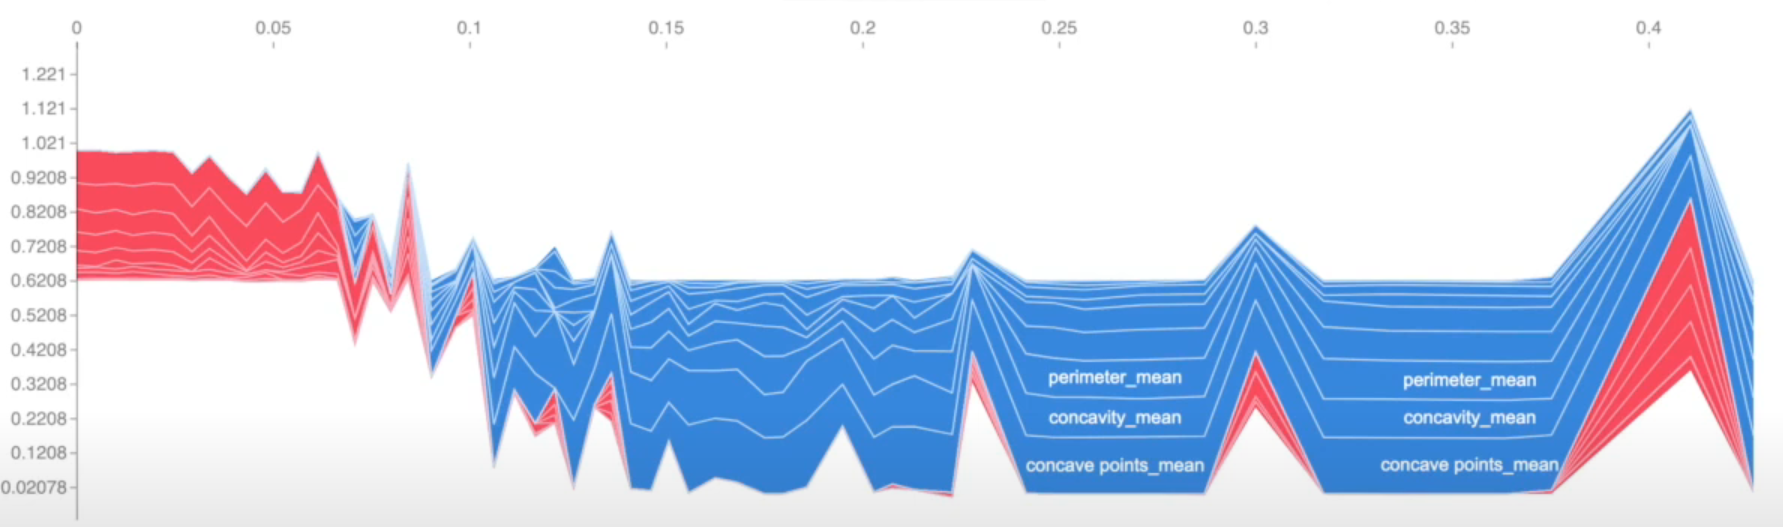

As features mais importantes do dataset podem ser analisadas através de:

In [ ]:
shap.summary_plot(shap_values[1], Xtrain)

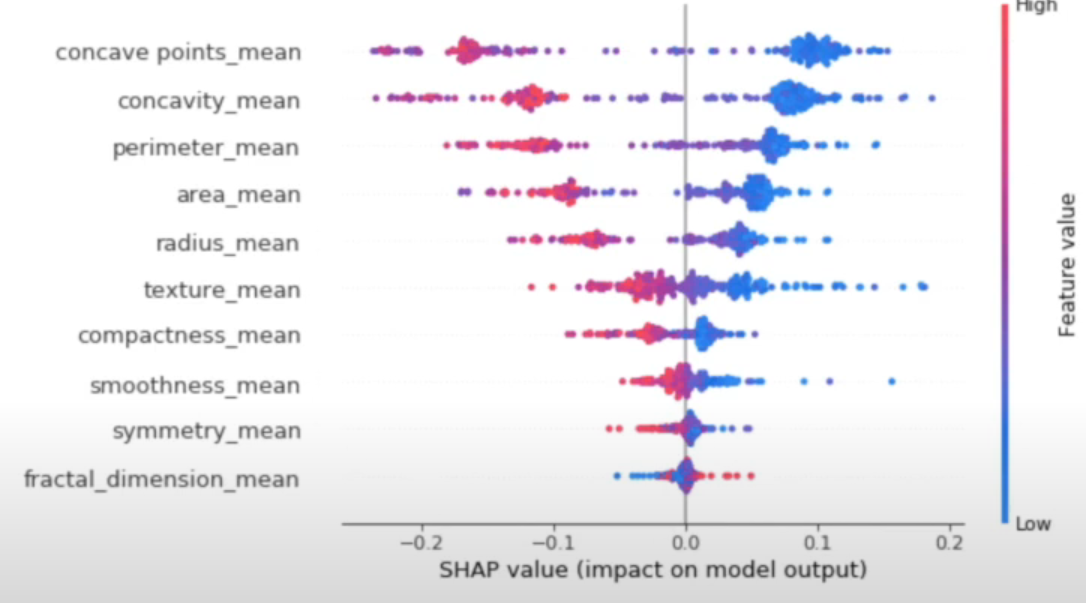


Como a variação de uma feature altera a previsão:

In [ ]:
shap.dependence_plot("concave points_mean", shap_values[1], Xtrain, interaction_index=None)

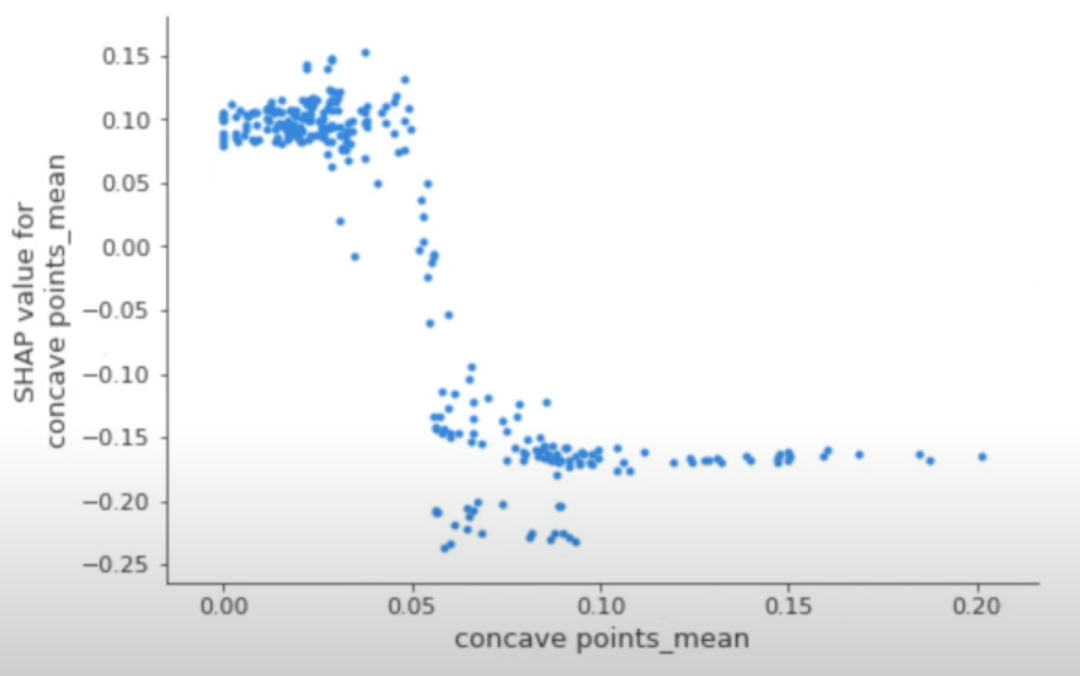

Se os valores de concave points_mean ficam abaixo de 0.05, aumenta-se a probabilidade do câncer ser benigno.